# References:
- https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
- https://github.com/awjuliani/DeepRL-Agents

# Q-Learning 

## [Frozen Lake Environment](https://gym.openai.com/envs/FrozenLake-v0/) 

 The FrozenLake environment consists of a 4x4 grid of blocks, each one either being the **start block, the goal block, a safe frozen block, or a dangerous hole**. The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole. At any given time the agent can choose to move either up, down, left, or right. The catch is that there is a wind which occasionally blows the agent onto a space they didn’t choose. As such, perfect performance every time is impossible, but learning to avoid the holes and reach the goal are certainly still doable. The reward at every step is 0, except for entering the goal, which provides a reward of 1. 
 
 
                                SFFF  
                                FHFH  
                                FFFH  
                                HFFG  
                                
S - Starting Point, safe  
F - Frozen Surface, safe  
H - Hole, fall to your doom  
G - Goal, where the frisbee is located  

## Tabular Approaches for Tabular Environments
- In it’s simplest implementation, Q-Learning is a table of values for every state (row) and action (column) possible in the environment. 
- Within each cell of the table, we learn a value for how good it is to take a given action within a given state. - - In the case of the FrozenLake environment, we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a 16x4 table of Q-values. 
- We start by initializing the table to be uniform (all zeros), and then as we observe the rewards we obtain for various actions, we update the table accordingly.

### [Bellman Equation](https://en.wikipedia.org/wiki/Bellman_equation)
We make updates to our Q-table using something called the Bellman equation, which states that the expected long-term reward for a given action is equal to the immediate reward from the current action combined with the expected reward from the best future action taken at the following state. In this way, we reuse our own Q-table when estimating how to update our table for future actions! In equation form, the rule looks like this:

$$
Q(s,a) = r + \gamma (maxQ(s' , a'))
$$

This says that the Q-value for a given state (s) and action (a) should represent the current reward (r) plus the maximum discounted ($\gamma$) future reward expected according to our own table for the next state (s’) we would end up in. The discount variable allows us to decide how important the possible future rewards are compared to the present reward. By updating in this way, the table slowly begins to obtain accurate measures of the expected future reward for a given action in a given state. Below is a Python walkthrough of the Q-Table algorithm implemented in the FrozenLake environment:

In [1]:
import gym
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import random
import tensorflow as tf
import matplotlib.pyplot as plt

/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Load the environment

In [2]:
env = gym.make('FrozenLake-v0')

[2017-12-05 16:57:10,152] Making new env: FrozenLake-v0


### Implement Q-Table learning algorithm

In [7]:
print("Possible states are {} and possible actions are {}".format(env.observation_space.n,env.action_space.n))

Possible states are 16 and possible actions are 4


In [177]:
#Initialize table with all zeros
#[16,4]
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
learning_rate = .8
y = .95
num_episodes = 2000

#create lists to contain total rewards and steps per episode
steps_per_epoch = []
reward_list = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    total_reward = 0
    done = False #game over state
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        #Reduce chance of random action as we train the model with (1./(i+1))
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        #Update Q-Table with new knowledge
        Q[state,action] = Q[state,action] + learning_rate * (reward + y * np.max(Q[new_state,:]) - Q[state,action])
        total_reward += reward
        state = new_state
        if done == True:
            break
    steps_per_epoch.append(j)
    reward_list.append(total_reward)
    
print("Percent of succesful episodes: " + str(100 * sum(reward_list)/num_episodes) + "%")   #dynamic results 

Percent of succesful episodes: 47.45%


In [178]:
print("Score over time: " +  str(sum(reward_list)/num_episodes))
print("Final Q-Table Values")
print(Q)

Score over time: 0.4745
Final Q-Table Values
[[  3.48425186e-01   2.92386140e-03   3.08129491e-03   2.91222871e-03]
 [  1.15847656e-04   1.56260861e-04   1.27026112e-04   2.19865827e-01]
 [  6.77949577e-02   2.65284261e-03   2.97617550e-03   2.78862504e-03]
 [  6.58220276e-04   2.32870889e-03   1.97599056e-04   2.57166782e-03]
 [  4.53573329e-01   4.11857066e-04   1.85075979e-03   5.56210224e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.83412238e-06   2.77308357e-04   2.79797493e-03   3.92239452e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.24145924e-03   1.47529585e-05   3.38868133e-04   4.22635668e-01]
 [  1.92277413e-03   6.06155389e-01   1.24908077e-04   5.34320410e-03]
 [  7.99956084e-01   0.00000000e+00   7.85013546e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.70814678e-03   5.03873681e

#### What is goin on in selecting a new state

In [179]:
# Lets wee what is there in state 5
Q[4,:] #select row 4+1 and all the columns

array([  4.53573329e-01,   4.11857066e-04,   1.85075979e-03,
         5.56210224e-04])

In [180]:
#say at episode number 55
biased_noise = (1./(55+1))
print("Biased noise: ", biased_noise) # one is added to avoid division by zero
new_random_action = np.random.randn(1,env.action_space.n)*(1./(55+1))
print("new_random_action: ", new_random_action)
action_raw = new_random_action * biased_noise
print("new_random_action + noise: ", action_raw)
action = np.argmax(action)
print("New action will be : ", action)

Biased noise:  0.017857142857142856
new_random_action:  [[-0.00269487 -0.03530777 -0.05734659  0.00200914]]
new_random_action + noise:  [[ -4.81226687e-05  -6.30495840e-04  -1.02404622e-03   3.58774927e-05]]
New action will be :  0


In [181]:
new_state, reward, done, _ = env.step(action)
print(new_state, reward, done, _) 

if done:
    print("huh looks like the game is over ;)")

15 0 True {'prob': 1.0}
huh looks like the game is over ;)


### Some statistics on network performance

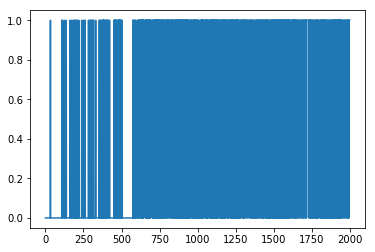

In [182]:
plt.plot(reward_list)

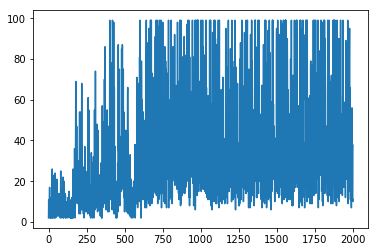

In [183]:
plt.plot(steps_per_epoch)

## Q-Learning with Neural Networks

Now, you may be thinking: tables are great, but they don’t really scale, do they? While it is easy to have a 16x4 table for a simple grid world, the number of possible states in any modern game or real-world environment is nearly infinitely larger. For most interesting problems, tables simply don’t work. We instead need some way to take a description of our state, and produce Q-values for actions without a table: that is where neural networks come in. By acting as a function approximator, we can take any number of possible states that can be represented as a vector and learn to map them to Q-values.
In the case of the FrozenLake example, we will be using a one-layer network which takes the state encoded in a one-hot vector (1x16), and produces a vector of 4 Q-values, one for each action. Such a simple network acts kind of like a glorified table, with the network weights serving as the old cells. The key difference is that we can easily expand the Tensorflow network with added layers, activation functions, and different input types, whereas all that is impossible with a regular table. The method of updating is a little different as well. Instead of directly updating our table, with a network we will be using backpropagation and a loss function. Our loss function will be sum-of-squares loss, where the difference between the current predicted Q-values, and the “target” value is computed and the gradients passed through the network. In this case, our Q-target for the chosen action is the equivalent to the Q-value computed in equation 1 above.

$$Loss = \sum (Q_{target} - Q)^2$$

### The Q-Network Approach

In [31]:
NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

NUM_STATES, NUM_ACTIONS

(16, 4)

In [32]:
tf.reset_default_graph()

#These lines establish the feed-forward part of the network used to choose actions

#Input Layer
input_states = tf.placeholder(shape=[1,NUM_STATES],dtype=tf.float32, name="input_states")
next_possible_actions = tf.placeholder(shape=[1,NUM_ACTIONS],dtype=tf.float32, name="nextQ")

#Initialize Weights Randomly
W = tf.Variable(tf.random_uniform([NUM_STATES,NUM_ACTIONS], 0, 0.01), name='W')

#Output Layer, choose the lartger value index in [0, NUM_ACTIONS-1] or [1, NUM_ACTIONS]
predict_actions = tf.matmul(input_states,W, name="Qout") #next possible actions
next_move = tf.argmax(predict_actions,axis=1, name="predict") #find max along the y-axis in next possible actions

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
loss = tf.reduce_sum(tf.square(next_possible_actions - predict_actions), name="loss")
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)



In [33]:
#Debug Info 
print(input_states)
print(next_possible_actions)
print(W)
print(predict_actions)
print(next_move)
print(loss)

Tensor("input_states:0", shape=(1, 16), dtype=float32)
Tensor("nextQ:0", shape=(1, 4), dtype=float32)
<tf.Variable 'W:0' shape=(16, 4) dtype=float32_ref>
Tensor("Qout:0", shape=(1, 4), dtype=float32)
Tensor("predict:0", shape=(1,), dtype=int64)
Tensor("loss:0", shape=(), dtype=float32)


#### Training the network

In [34]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000

# create lists to contain total rewards and steps per episode
stpes_per_epoch_1 = [] # "_1" added to avoid name colliding
reward_list_1 = []

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(num_episodes):
        #Reset environment and get first new observation
        state = env.reset() 
        reward_total_1 = 0
        done = False
        
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            
            #Choose an action by greedily (with e chance of random action) from the Q-network
            action, actions = sess.run([next_move,predict_actions],
                                    feed_dict={input_states:np.identity(16)[state:state+1]})
            
            if np.random.rand(1) < e:
                action[0] = env.action_space.sample()
                
            #Get new state and reward from environment
            new_state, reward, done, _ = env.step(action[0])
            
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(predict_actions,feed_dict = {input_states:np.identity(16)[new_state:new_state+1]})
            
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = actions #[1, NUM_ACTIONS]
            # update the Q
            targetQ[0,action[0]] = reward + y * maxQ1
            
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={input_states:np.identity(16)[state:state+1], 
                                                       next_possible_actions:targetQ})
            
            reward_total_1 += reward
            
            state = new_state
            
            if done == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
                
        stpes_per_epoch_1.append(j)
        reward_list_1.append(reward_total_1)


In [35]:
print("Percent of succesful episodes: " + str(sum(reward_list_1)/num_episodes) + "%")

Percent of succesful episodes: 0.4575%


### Lets RIP above code

In [36]:
actions

array([[ 0.69187534,  1.00746906,  0.71174949,  0.67777467]], dtype=float32)

In [37]:
env.action_space.sample()

2

In [38]:
state = env.reset()
print(state)
identity = np.identity(16)#[16,16]
print(identity[state:state+1])
state = 2
print(identity[state:state+1])

0
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.

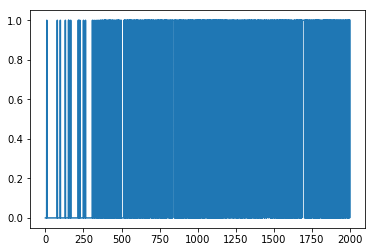

In [39]:
plt.plot(reward_list_1)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

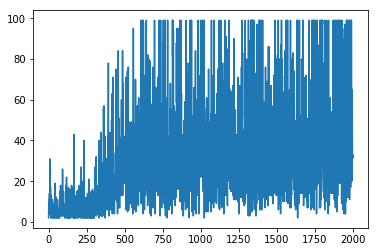

In [40]:
plt.plot(stpes_per_epoch_1)

While the network learns to solve the FrozenLake problem, it turns out it doesn’t do so quite as efficiently as the Q-Table. While neural networks allow for greater flexibility, they do so at the cost of stability when it comes to Q-Learning. There are a number of possible extensions to our simple Q-Network which allow for greater performance and more robust learning. Two tricks in particular are referred to as **Experience Replay** and **Freezing Target Networks**. Those improvements and other tweaks were the key to getting Atari-playing Deep Q-Networks, and we will be exploring those additions in the future. For more info on the theory behind Q-Learning, see [this great post](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/) by Tambet Matiisen. I hope this tutorial has been helpful for those curious about how to implement simple Q-Learning algorithms!
